In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix #For confusion matrixes

In [55]:
df=pd.read_csv("/content/Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
df.drop(['Id'], axis=1, inplace=True)

In [59]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [61]:
df.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [62]:
df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [63]:
df.duplicated().sum()

3

In [64]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [65]:
df['Species'].value_counts()

,count
Species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


<ipython-input-66-3e67a67ddabb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='Set2')


<Axes: xlabel='Species', ylabel='count'>

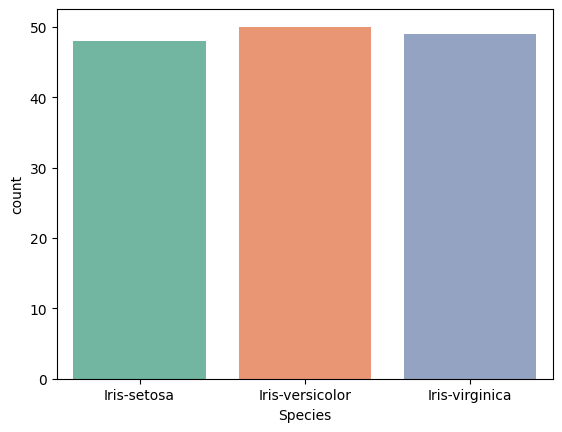

In [66]:
sns.countplot(x='Species', data=df, palette='Set2')


In [67]:
df.groupby(["Species"], as_index=False)["SepalLengthCm"].mean()

,Species,SepalLengthCm
0,Iris-setosa,5.010417
1,Iris-versicolor,5.936000
2,Iris-virginica,6.604082


<ipython-input-68-d0d4c9fa236b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Species", y="SepalLengthCm", data=df, palette=colors)


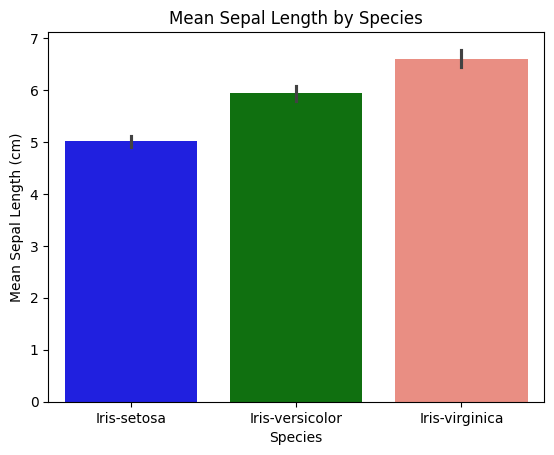

In [68]:
# Define custom colors
colors = ["blue", "green", "salmon"]
# Plot using seaborn
sns.barplot(x="Species", y="SepalLengthCm", data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Sepal Length (cm)")
plt.title("Mean Sepal Length by Species")

# Show the plot
plt.show()

<ipython-input-69-f8688a474a8c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette=colors)


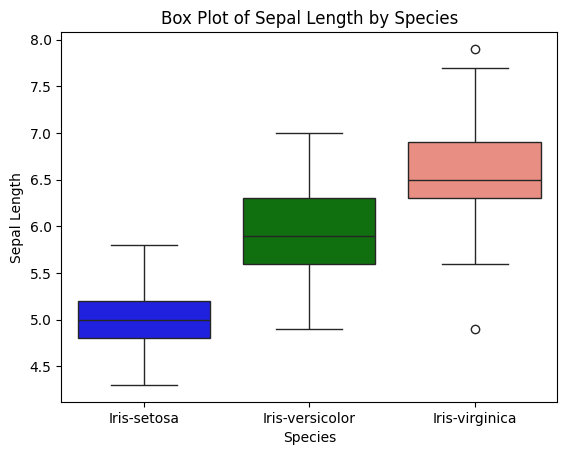

In [69]:
sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")

# Show plot
plt.show()

In [70]:
df.groupby(["Species"], as_index=False)["SepalWidthCm"].mean()

,Species,SepalWidthCm
0,Iris-setosa,3.431250
1,Iris-versicolor,2.770000
2,Iris-virginica,2.979592


<ipython-input-71-adffaf4589e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Species", y="SepalWidthCm", data=df, palette=colors)


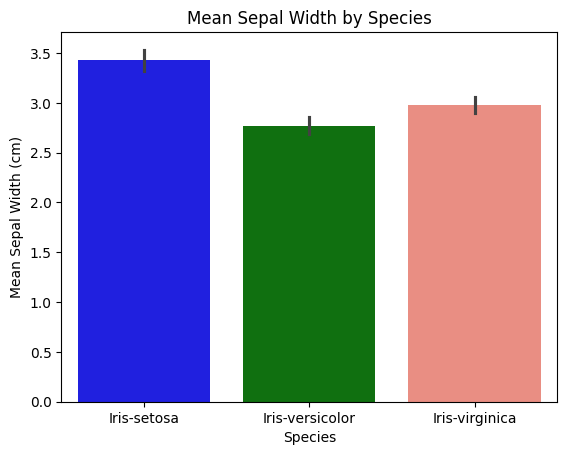

In [71]:
# Plot using seaborn
sns.barplot(x="Species", y="SepalWidthCm", data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Sepal Width (cm)")
plt.title("Mean Sepal Width by Species")

# Show the plot
plt.show()

<ipython-input-72-b285dee21072>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=colors)


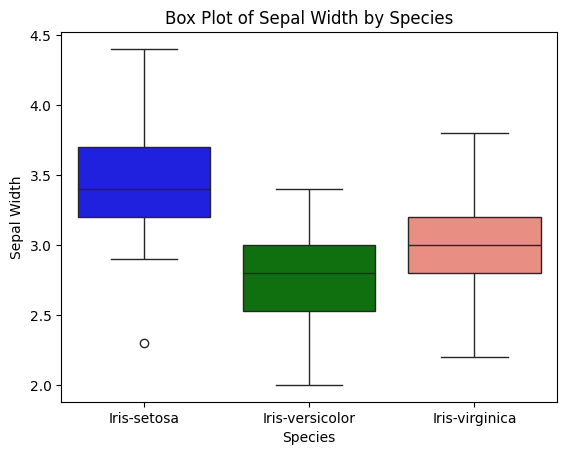

In [72]:
sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")

# Show plot
plt.show()

In [73]:
df.groupby(["Species"], as_index=False)["PetalLengthCm"].mean()

,Species,PetalLengthCm
0,Iris-setosa,1.462500
1,Iris-versicolor,4.260000
2,Iris-virginica,5.561224


<ipython-input-74-deb16b3d2856>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Species", y="PetalLengthCm", data=df, palette=colors)


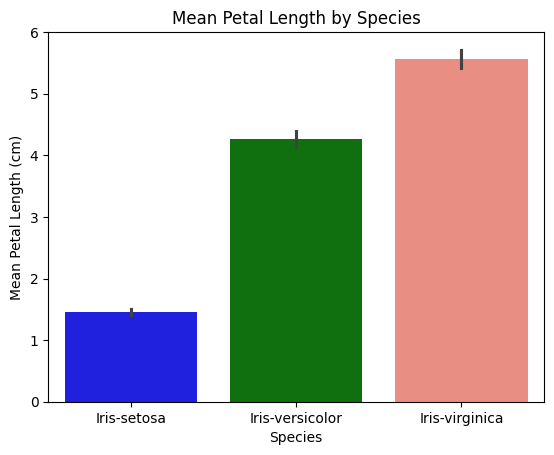

In [74]:
sns.barplot(x="Species", y="PetalLengthCm", data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Petal Length (cm)")
plt.title("Mean Petal Length by Species")

# Show the plot
plt.show()

<ipython-input-75-b7e772621d34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette=colors)


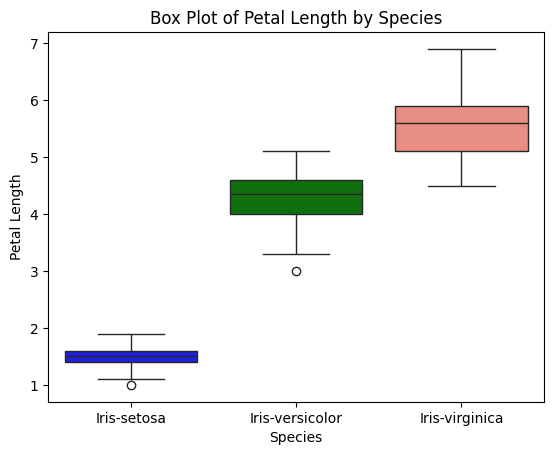

In [75]:
sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")

# Show plot
plt.show()

In [76]:
df.groupby(["Species"], as_index=False)["PetalWidthCm"].mean()

,Species,PetalWidthCm
0,Iris-setosa,0.250000
1,Iris-versicolor,1.326000
2,Iris-virginica,2.028571


<ipython-input-77-570a8ef6beb7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='PetalWidthCm', data=df, palette=colors)


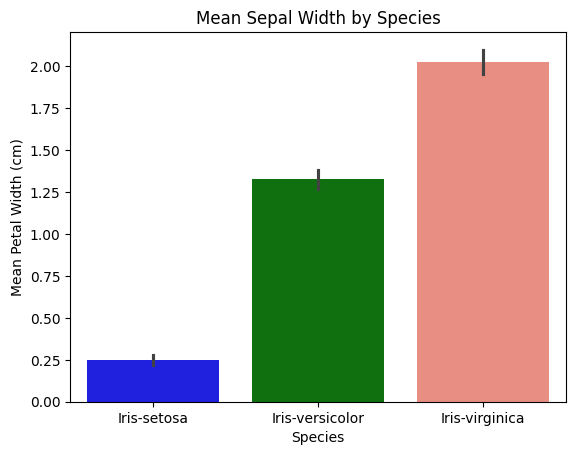

In [77]:
sns.barplot(x='Species', y='PetalWidthCm', data=df, palette=colors)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Mean Petal Width (cm)")
plt.title("Mean Sepal Width by Species")

# Show the plot
plt.show()

<ipython-input-78-09706c1b826b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=colors)


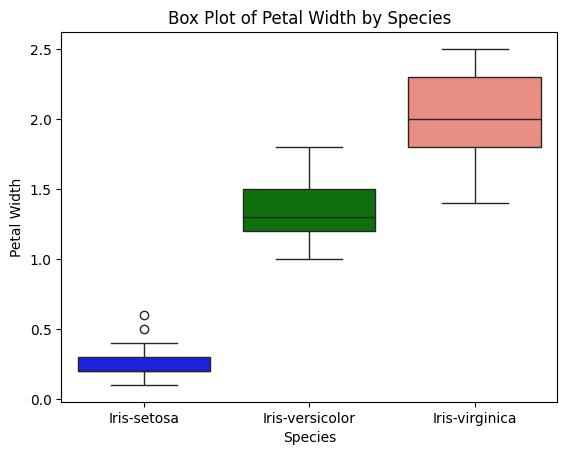

In [78]:
sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=colors)

# Add title and labels
plt.title("Box Plot of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")

# Show plot
plt.show()

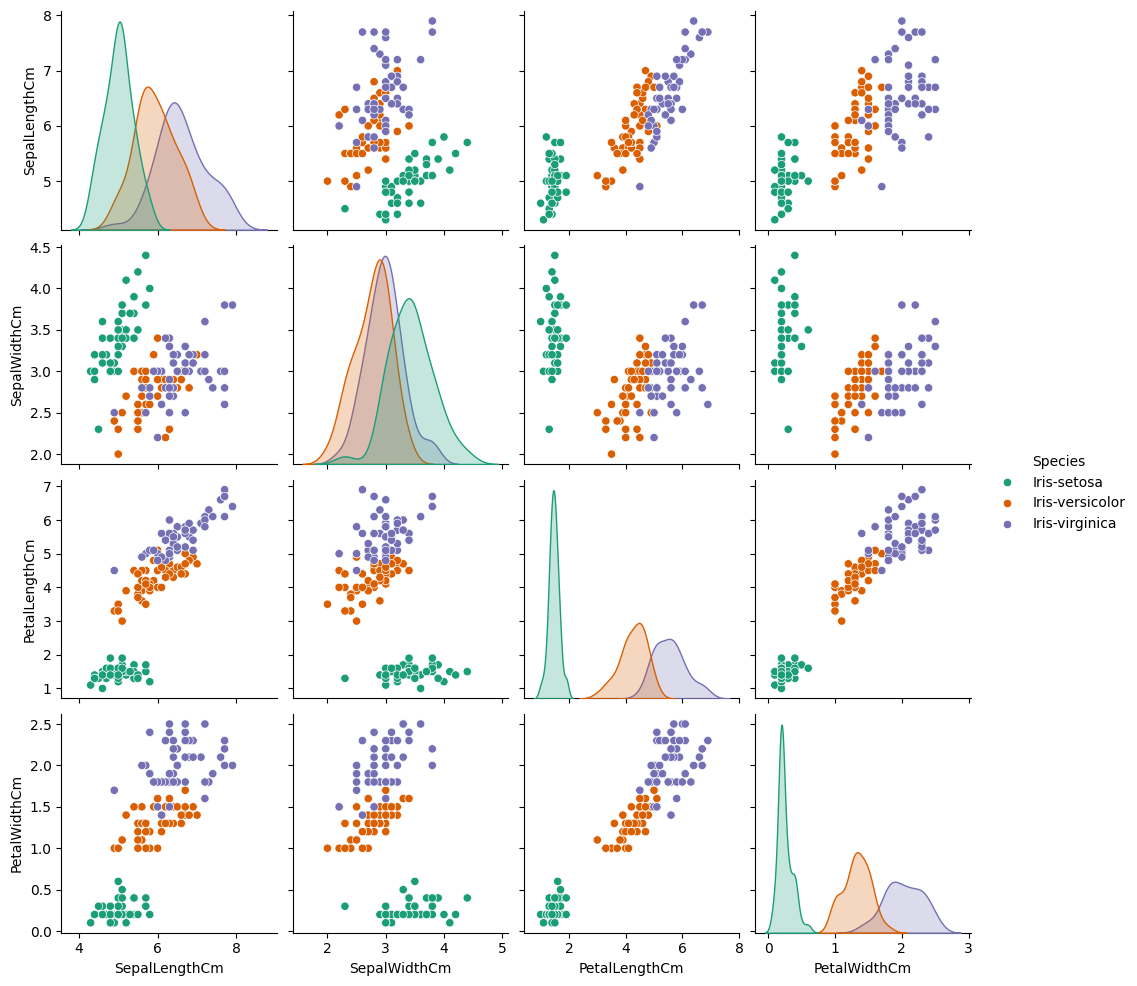

In [79]:
# Make Pair plot
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()


In [80]:
df1 = df.copy()

In [81]:
dfcorr=df.drop(['Species'], axis=1).corr()

In [82]:
dfcorr.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.940945,0.975569,0.962857
SepalWidthCm,-0.940945,1.000000,-0.992055,-0.994701
PetalLengthCm,0.975569,-0.992055,1.000000,0.997923
PetalWidthCm,0.962857,-0.994701,0.997923,1.000000


<Axes: >

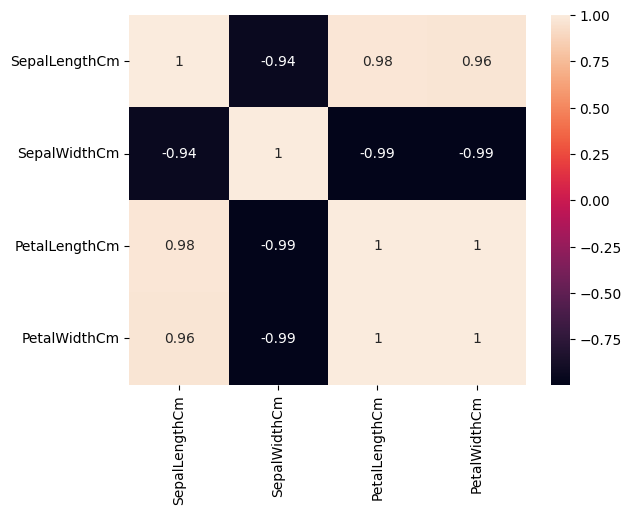

In [83]:
sns.heatmap(dfcorr.corr() , annot =True)

In [84]:
# Splitting into features and target
x = df.drop(['Species'], axis=1)
y = df['Species']

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)
method_names = []
method_scores = []

In [85]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

Logistic Regression Classification Test Accuracy 0.9555555555555556


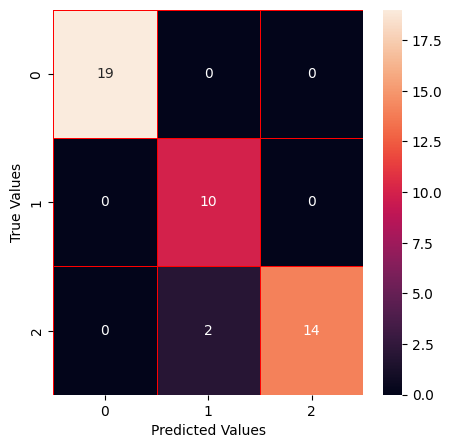

In [86]:
#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [87]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.044444444444444446
MSE: 0.044444444444444446


In [88]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(x_test,y_test)))

Score for Number of Neighbors = 6: 0.9555555555555556


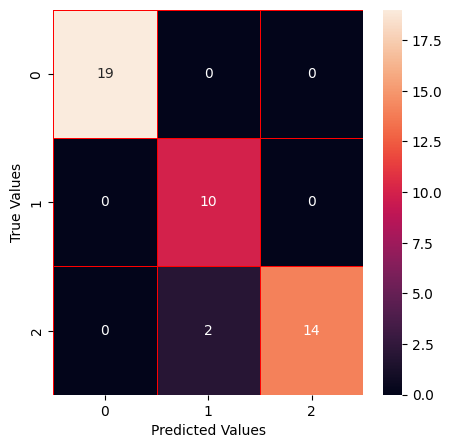

In [89]:
#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

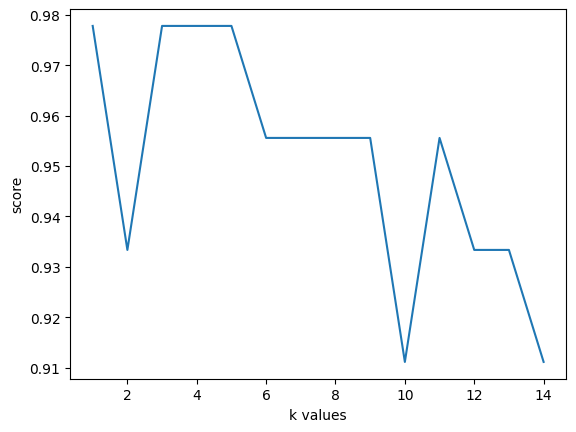

In [90]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 4: 0.9777777777777777


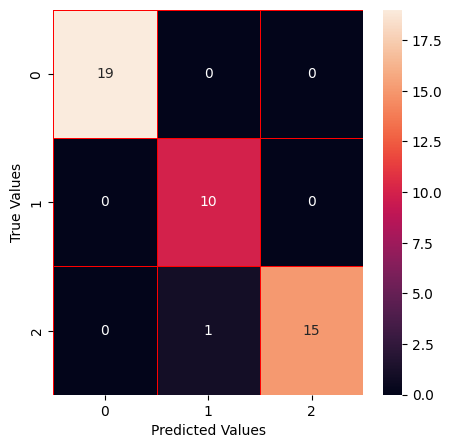

In [91]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 4: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [92]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.022222222222222223
MSE: 0.022222222222222223


In [93]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

SVM Classification Score is: 0.9555555555555556


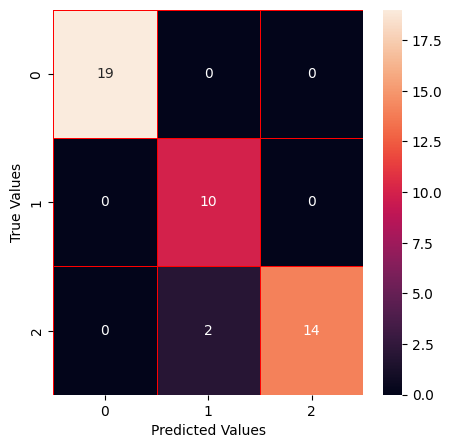

In [94]:
#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [95]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.044444444444444446
MSE: 0.044444444444444446


In [96]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

Decision Tree Classification Score:  0.9555555555555556


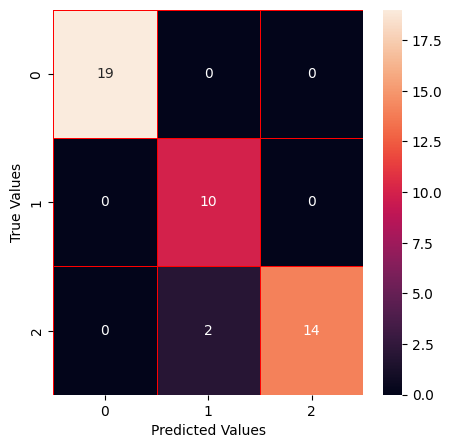

In [97]:
#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [98]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.044444444444444446
MSE: 0.044444444444444446


In [99]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

Random Forest Classification Score:  0.9777777777777777


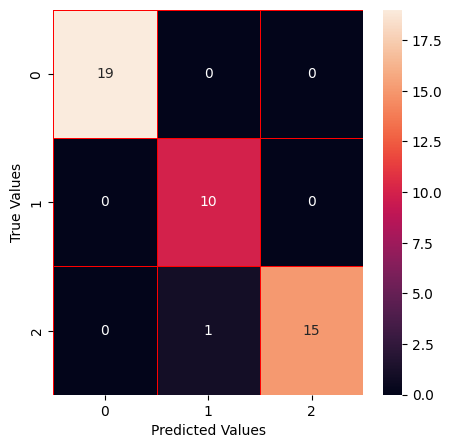

In [100]:
#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [101]:
#Calculate MAE, MSE for LogisticRegression

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate the metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.022222222222222223
MSE: 0.022222222222222223


Text(0, 0.5, 'Method Score')

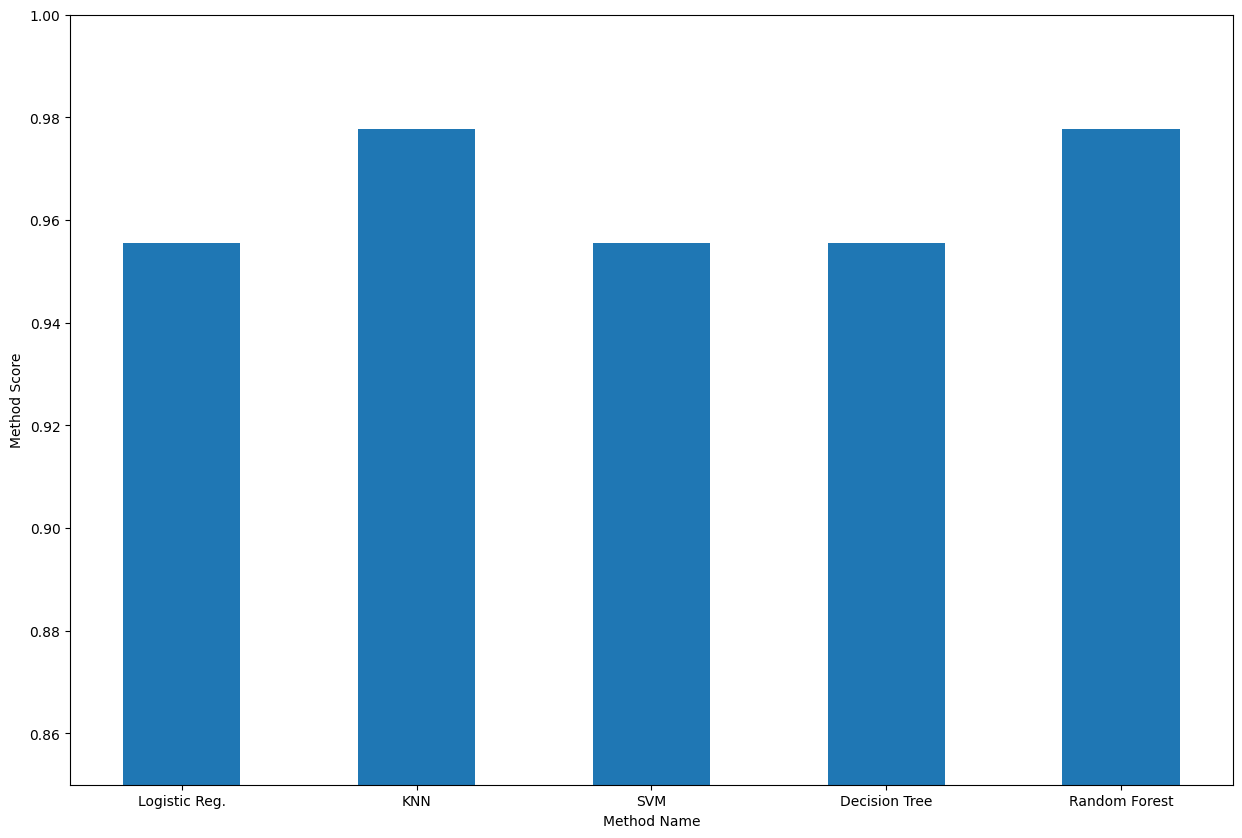

In [102]:
plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

In [103]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    return log_reg.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0]

In [104]:
species = predict_species(5.9, 2.7, 4.2, 1.3) # this is the data of Iris-sentosa
print(f"Predicted Species: {species}")

Predicted Species: Iris-versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [105]:
species = predict_species(6.6,2.9, 5.5, 1.5) # this is the data of Iris-sentosa
print(f"Predicted Species: {species}")

Predicted Species: Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [106]:
species = predict_species(5.1, 3.5, 1.4, 0.2) # this is the data of Iris-sentosa
print(f"Predicted Species: {species}")

Predicted Species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
